In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# Plots are shown as "png". In order to run as interactive just remove "png" - fig.show()

### 1. Distance travelled per month.

In [2]:
distance = pd.read_csv("02_distance_per_month.csv", sep="\t", header=None, names=["month", "distance"])
distance

,month,distance
0,1,452639866
1,2,412298873
2,3,491096330
3,4,474854920
4,5,492176105
5,6,507435916
6,7,528615986
7,8,519257974
8,9,463823815
9,10,484539235


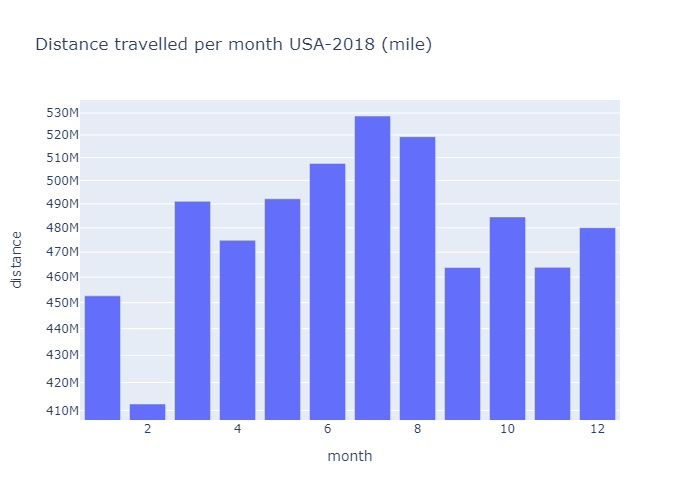

In [3]:
fig = px.bar(data_frame=distance, y="distance", x="month", log_y=True, title="Distance travelled per month USA-2018 (mile)")
fig.show("png")

### 2. Average departure/arrival delay.

In [4]:
avg_delay = pd.read_csv("04_avg_delay_per_month.csv", header=None, sep="\t")
dep_arr_delay = avg_delay[1].str[1:-1].str.split(", ", expand=True)
avg_delay["dep_delay"], avg_delay["arr_delay"] = dep_arr_delay[0], dep_arr_delay[1]
avg_delay.drop(axis=1, labels=[1], inplace=True)
avg_delay.rename({0:"month"}, axis=1, inplace=True)
avg_delay[["dep_delay", "arr_delay"]] = avg_delay[["dep_delay", "arr_delay"]].astype("float")
avg_delay

,month,dep_delay,arr_delay
0,1,9.199627,2.740163
1,2,9.223253,3.608159
2,3,7.423542,1.969525
3,4,8.352085,3.558252
4,5,10.543614,5.754866
5,6,12.826750,8.318726
6,7,13.392787,8.907844
7,8,13.479407,9.505214
8,9,7.277832,2.727067
9,10,6.941860,2.798122


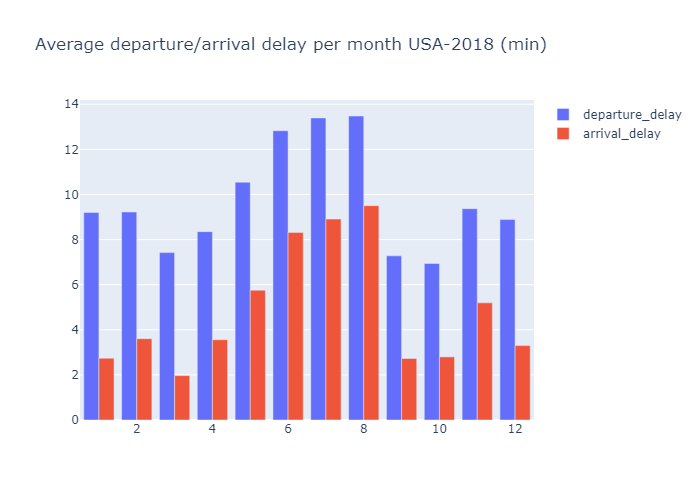

In [5]:
fig = go.Figure(data=[go.Bar(x=avg_delay.month, y=avg_delay.dep_delay, name='departure_delay'),
                     go.Bar(x=avg_delay.month, y=avg_delay.arr_delay, name='arrival_delay')],
               layout=go.Layout(title='Average departure/arrival delay per month USA-2018 (min)'))
fig.show("png")

### 3. Percentage of cancelled flights per month.

In [6]:
cancelled_flights = pd.read_csv("06_cancelled_flights_rate_per_month.csv", header=None, sep='\t')
cancelled_flights.columns=["month", "cancelled_flights"]
cancelled_flights.cancelled_flights = cancelled_flights.cancelled_flights.apply(lambda x: x * 100)
cancelled_flights

,month,cancelled_flights
0,1,3.011482
1,2,1.723731
2,3,2.823589
3,4,1.048745
4,5,1.160529
5,6,1.707780
6,7,1.717498
7,8,1.916165
8,9,1.388308
9,10,0.727965


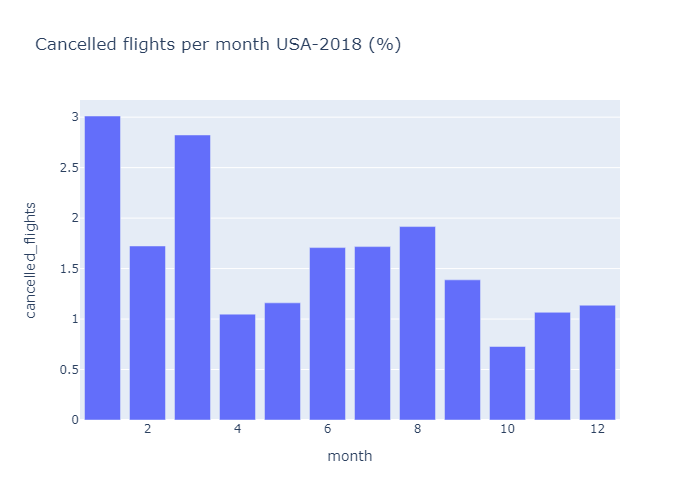

In [7]:
fig = px.bar(data_frame=cancelled_flights, y="cancelled_flights", x="month", title="Cancelled flights per month USA-2018 (%)")
fig.show("png")